<a href="https://colab.research.google.com/github/ashitoshp321-eng/Credit-Score/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart (2).csv


In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [ ]:
from google.colab import files
uploaded = files.upload()




Saving heart.csv to heart (3).csv


In [ ]:
df = pd.read_csv("heart.csv")

print("\nDataset Preview:")
print(df.head())

print("\nDataset Info:")
print(df.info())



Dataset Preview:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   ch

In [ ]:
X = df.drop("target", axis=1)   # replace 'target' if your label column has a different name
y = df["target"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000), # Increased max_iter
    "SVM": SVC(kernel="linear", probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}

for name, model in models.items():
    acc = cross_val_score(model, X, y, cv=cv, scoring="accuracy").mean()
    prec = cross_val_score(model, X, y, cv=cv, scoring="precision").mean()
    rec = cross_val_score(model, X, y, cv=cv, scoring="recall").mean()
    f1 = cross_val_score(model, X, y, cv=cv, scoring="f1").mean()

    cv_results[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    }

cv_results_df = pd.DataFrame(cv_results).T
print("\nCross Validation Results (5-Fold Average):\n")
print(cv_results_df)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Cross Validation Results (5-Fold Average):

                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.848780   0.822730  0.901096  0.859310
SVM                  0.843902   0.806246  0.918239  0.857914
Random Forest        0.996098   1.000000  0.992381  0.996117
XGBoost              1.000000   1.000000  1.000000  1.000000


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:38:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


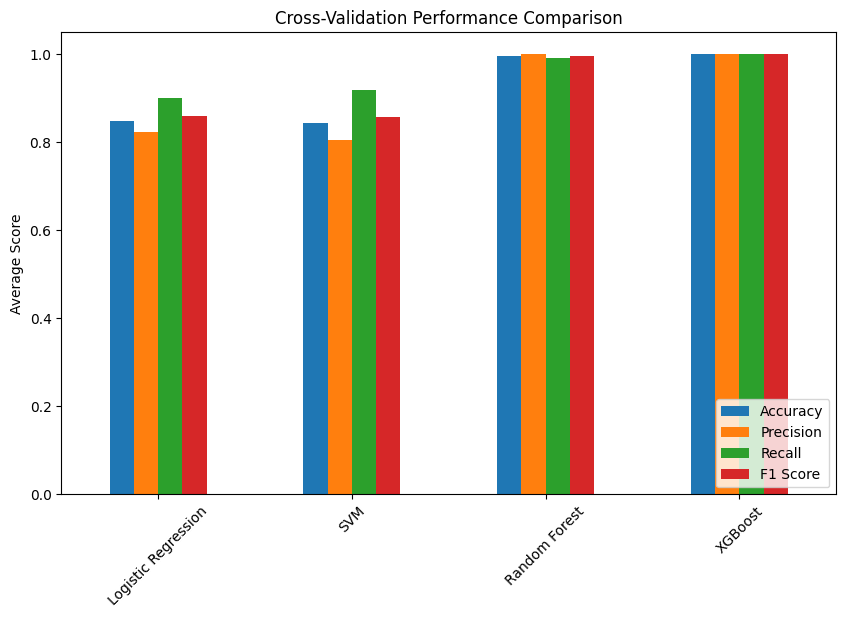

In [13]:
cv_results_df.plot(kind="bar", figsize=(10,6))
plt.title("Cross-Validation Performance Comparison")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.show()

In [14]:
best_model_name = cv_results_df["F1 Score"].idxmax()
print(f"\nBest Model Selected: {best_model_name}")

best_model = models[best_model_name]
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(f"\nFinal Classification Report ({best_model_name} on Test Set):\n")
print(classification_report(y_test, y_pred))


Best Model Selected: XGBoost

Final Classification Report (XGBoost on Test Set):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:40:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


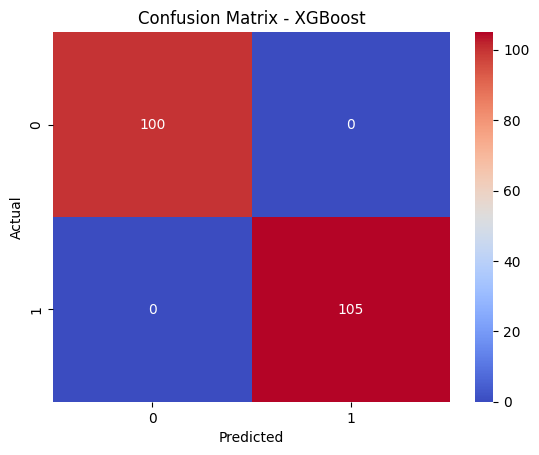

In [15]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()

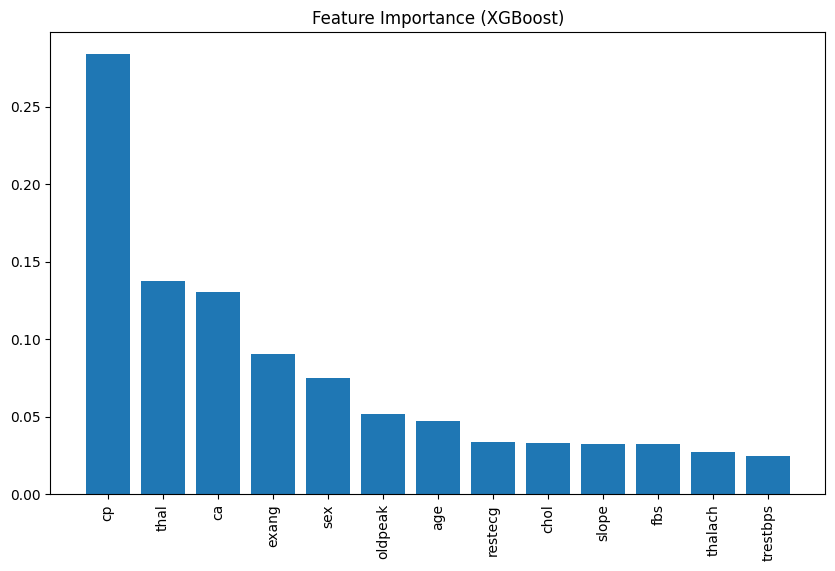

In [16]:
if best_model_name in ["Random Forest", "XGBoost"]:
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10,6))
    plt.title(f"Feature Importance ({best_model_name})")
    plt.bar(range(X.shape[1]), importances[indices], align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
    plt.show()
else:
    print(f"\nFeature importance is not available for {best_model_name}.")
